# Homework4. Spectrogram

Daniil Sherki

**TASK**

A spectrogram is a plot of signal intensity versus time and frequency. It is produced using the windowed Fourier transform. To do the home task use the code provided during the session ([link](https://gist.github.com/ssstuvz/ae1ac98b70d7df139a886e89f2094ee7)).
 
**CRITERIA:**

1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum (1 point)
2. Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes (2 points)
3. Change the number of time steps in your signal to the power of 2 (i.e. 2^14) and then slightly change the number of timesteps (i.e 2^14 +- 5). Measure the timing, can you explain the difference? Write something as a possible explanation. (2 points)

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'signal, arb.units')

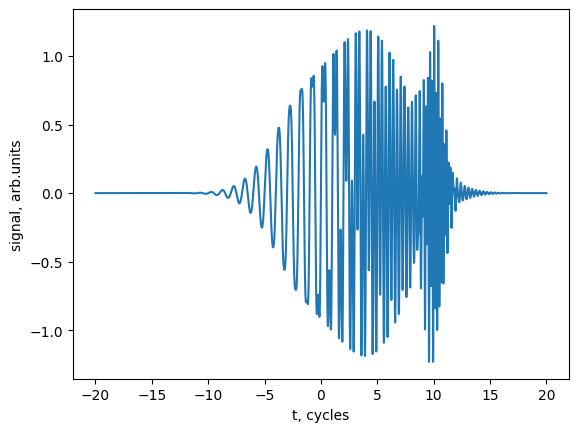

In [2]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

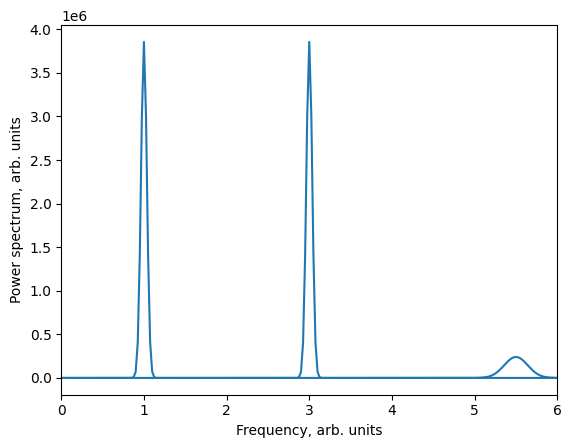

In [3]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

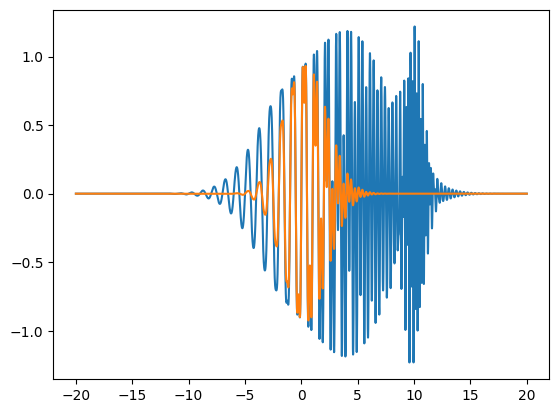

In [4]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

from scipy.signal import argrelextrema
import seaborn as sns

from tqdm.notebook import tqdm
import os
import imageio

/Users/danilsherki/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def get_specgram(t, y, nwindowsteps=1000, freq_limit=10):

    # your implementation here
    window_width = (t[-1] - t[0]) / nwindowsteps
    window_positions = np.linspace(t[0], t[-1], nwindowsteps)
    w_spec = np.fft.fftfreq(len(y), d=(t[1]-t[0]) / 2 / np.pi)

    freq_limit_idx = np.where(w_spec >= freq_limit)[0][0] if freq_limit else -1
    w_spec = w_spec[:freq_limit_idx]
    
    specgram = np.array([]).reshape(0, freq_limit_idx)
    for w_pos in window_positions:
        window_function = np.exp(-(t - w_pos) ** 2 / 2 / window_width ** 2)
        y_window = y * window_function
        sp = np.fft.fft(y_window)
        sp = np.abs(sp) ** 2
        sp = sp[:freq_limit_idx]
        specgram = np.vstack([specgram, sp])

    return np.array(specgram).T

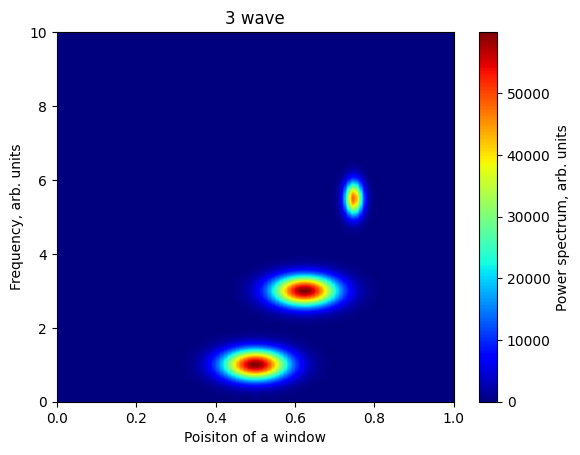

In [7]:
# plot spectrogram, explain what you see

spec3 = get_specgram(t, y, 100)

plt.imshow(spec3, aspect='auto', cmap='jet', origin='lower', extent=[0, 1, 0, 10])
plt.colorbar(label='Power spectrum, arb. units')

plt.ylabel('Frequency, arb. units')
plt.xlabel('Poisiton of a window')
plt.title('3 wave');

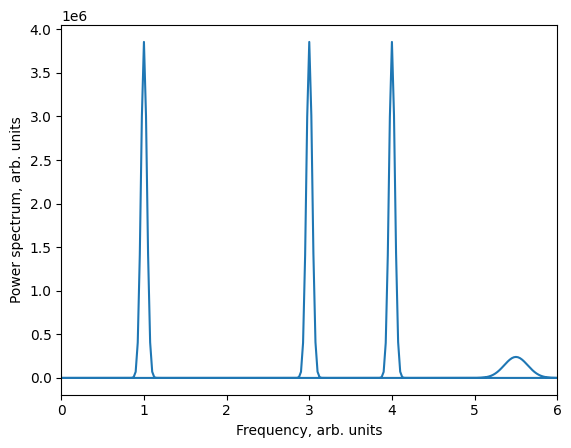

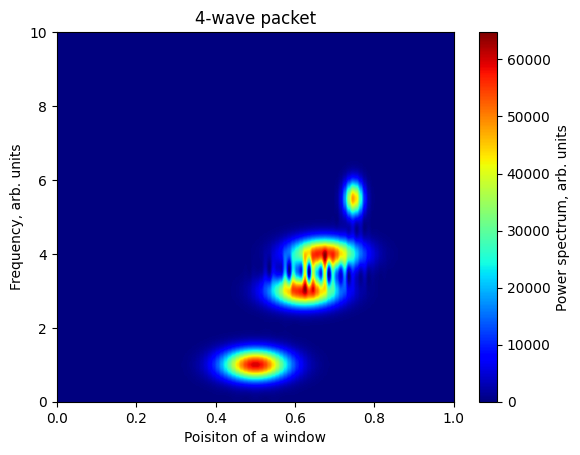

In [8]:
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)
spec = get_specgram(t, y, 100)

sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.figure()
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')
show()

plt.imshow(spec, aspect='auto', cmap='jet', origin='lower', extent=[0, 1, 0, 10])
plt.colorbar(label='Power spectrum, arb. units')

plt.ylabel('Frequency, arb. units')
plt.xlabel('Poisiton of a window')
plt.title('4-wave packet');

In [9]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [10]:
%%timeit -n 20 -r 20
_ = get_specgram(t, y, nwindowsteps=80)

19.9 ms ± 566 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [11]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + 5)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [12]:
%%timeit -n 20 -r 20
_ = get_specgram(t, y, nwindowsteps=80)

85.6 ms ± 1.14 ms per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [13]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + 10)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [14]:
%%timeit -n 20 -r 20
_ = get_specgram(t, y, nwindowsteps=80)

84.7 ms ± 1.15 ms per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [15]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + 15)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [16]:
%%timeit -n 20 -r 20
_ = get_specgram(t, y, nwindowsteps=80)

33.2 ms ± 840 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [17]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + 20)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [18]:
%%timeit -n 20 -r 20
_ = get_specgram(t, y, nwindowsteps=80)

82.6 ms ± 1.39 ms per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [19]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + 25)
y = np.sin(t) * np.exp(-t**2/2/20**2)
y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
y = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)

In [20]:
%%timeit -n 20 -r 10
_ = get_specgram(t, y, nwindowsteps=80)

85 ms ± 1.89 ms per loop (mean ± std. dev. of 10 runs, 20 loops each)


# Results 

My simple google research shows me that FFT algorithm in numpy works better for power of 2 timestep.

According to whe [link](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) and [link](https://blog.hpc.qmul.ac.uk/pyfftw.html), 

> The Fast Fourier Transform (FFT) in NumPy works better with a power of 2 due to the algorithm it uses. The Cooley-Tukey algorithm, which NumPy's FFT function is based on, works efficiently when the number of points is a power of 2. While FFTs don't strictly require power-of-two inputs, NumPy performs much better with them. When the input size is not a power of 2, NumPy may pad the input vector or truncate it to calculate the FFT. This is why using a power of 2 for the input size can lead to better performance.

> In a situation where the input size is not a power of 2, the FFT can still be computed, but it may not be as efficient as when the input size is a power of 2. However, there are other libraries like ```pyFFTW``` that provide faster FFT implementations for non-power-of-two cases.